# Series de tiempo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

import statsmodels.formula.api as snf
import statsmodels.tsa.api as smt
import statsmodels.api as sma
import statsmodels as sm
import scipy.stats as scs

In [2]:
#index_col: índice será la columna 'Time'
#parse_dates: 
ads = pd.read_csv('https://bit.ly/2l9BdhA', index_col=['Time'], parse_dates=['Time']) 
cur = pd.read_csv('https://bit.ly/2lLao3B', index_col=['Time'], parse_dates=['Time'])

print(ads.head())
print(cur.head())

                        Ads
Time                       
2017-09-13 00:00:00   80115
2017-09-13 01:00:00   79885
2017-09-13 02:00:00   89325
2017-09-13 03:00:00  101930
2017-09-13 04:00:00  121630
            GEMS_GEMS_SPENT
Time                       
2017-05-01          1199436
2017-05-02          1045515
2017-05-03           586111
2017-05-04           856601
2017-05-05           793775


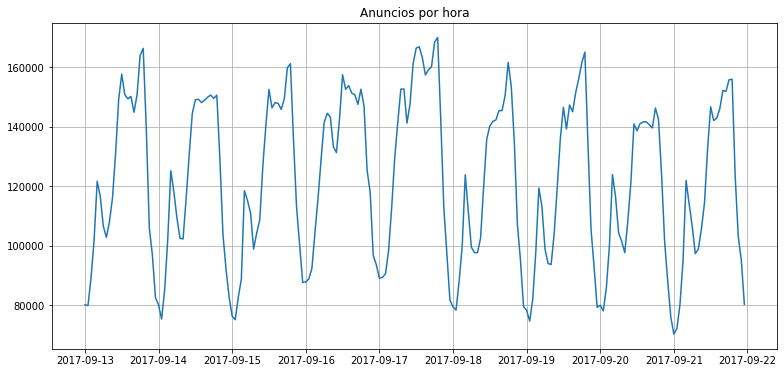

In [4]:
plt.figure(figsize=(13,6))
plt.plot(ads.Ads)
plt.title('Anuncios por hora')
plt.grid()
plt.show()

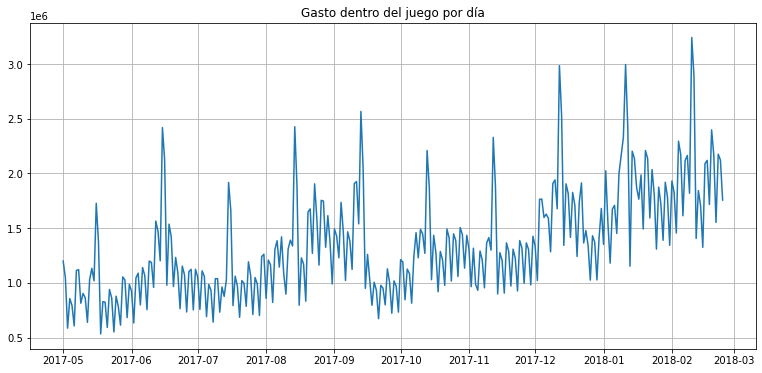

In [5]:
plt.figure(figsize=(13,6))
plt.plot(cur.GEMS_GEMS_SPENT)
plt.title('Gasto dentro del juego por día')
plt.grid()
plt.show()

## Media móvil

In [3]:
def moving_average(serie, n):
    return np.average(serie[-n:])

moving_average(ads, 24)

#Otra opción:
#DataFrame.rolling(window).mean()

116805.0

## Métricas

**Ventana**: número de valores que iremos tomando en cuanta hacía atrás.

In [23]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
def plot_moving_average(series, window_size, plot_intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = series.rolling(window=window_size).mean()
    plt.figure(figsize=(15, 5))
    plt.title('Media móvil \ntamaño de ventana = {}'.format(window_size))
    plt.plot(rolling_mean, 'g', label='Tendencia por media móvil')
    #Intervalos de confianza
    if plot_intervals:
        mae = mean_absolute_error(series[window_size:], rolling_mean[window_size:])
        deviation = np.std(series[window_size:] - rolling_mean[window_size:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(lower_bound, 'r--', label='Límites sup/inf')
        plt.plot(upper_bound, 'r--')
        #Anomalías
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bound] = series[series < lower_bound]
            anomalies[series > upper_bound] = series[series > upper_bound]
            plt.plot(anomalies, 'ro', markersize=10)
    plt.plot(series[window_size:], label='Valores reales')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

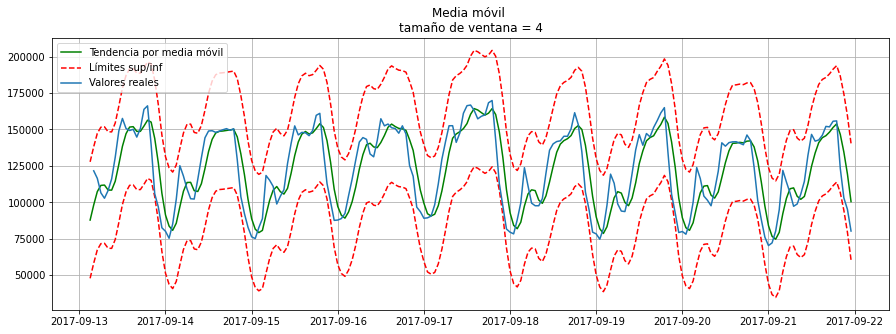

In [30]:
plot_moving_average(ads, 4, plot_intervals=True, plot_anomalies=True)

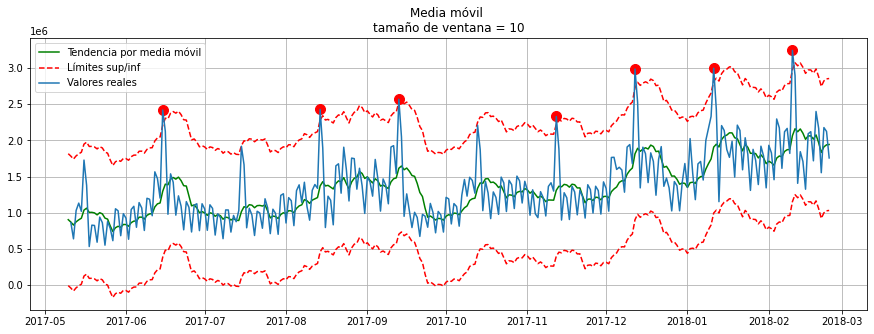

In [53]:
plot_moving_average(cur, 10, plot_intervals=True, plot_anomalies=True)

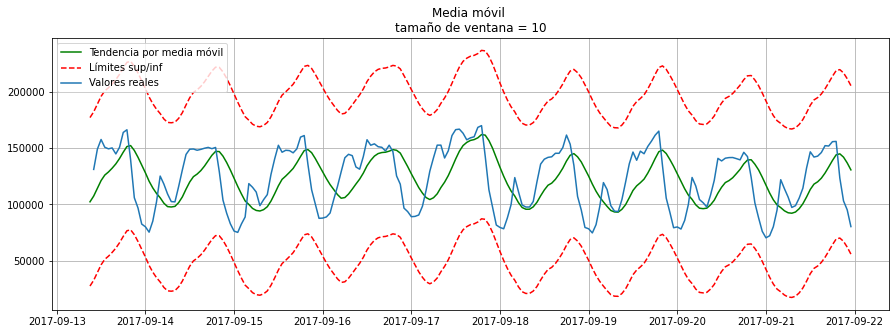

In [52]:
plot_moving_average(ads, 10, plot_intervals=True, plot_anomalies=True)

## AutoCorrelation Function

Su gráfica nos sirve para determinar valores posibles para su media móvil. Los puntos por arriba del área de correlación será la cantidad de la ventana para usar en las gráficas de media móvil. Concretamente, nos da buenos valores para calcular la media móvil.

Para usar *ventana móvil* tenemos que asegurarnos que los picos vayan decayendo dentro del área azul. 

In [35]:
data = sm.datasets.sunspots.load_pandas().data
data.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


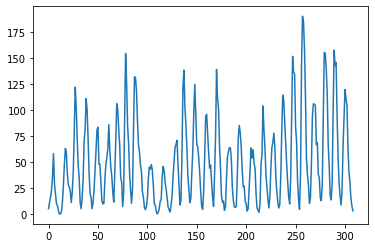

In [37]:
data.SUNACTIVITY.plot()
plt.show()

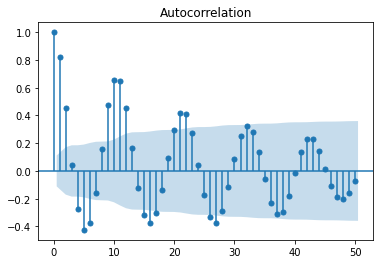

In [38]:
sm.graphics.tsaplots.plot_acf(data.SUNACTIVITY, lags=50)
plt.show()

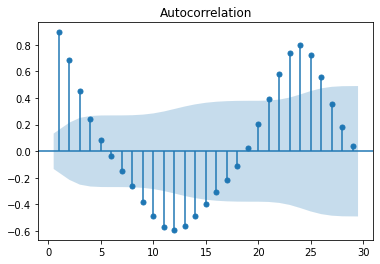

In [39]:
sm.graphics.tsaplots.plot_acf(ads.Ads, lags=range(1,30), alpha=0.05)
plt.show()

Cuando no es muy claro ver que los valores van recayendo, podemos incrementar el numero de lags

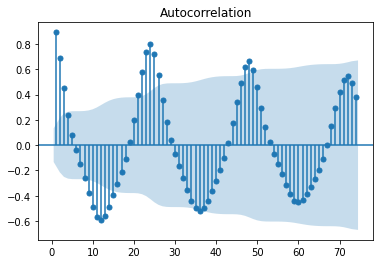

In [40]:
sm.graphics.tsaplots.plot_acf(ads.Ads, lags=range(1,75), alpha=0.05)
plt.show()

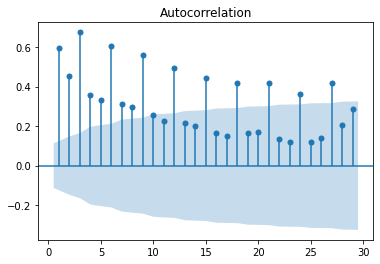

In [41]:
sm.graphics.tsaplots.plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1,30), alpha=0.05) #alpha es el porcentaje error
plt.show()

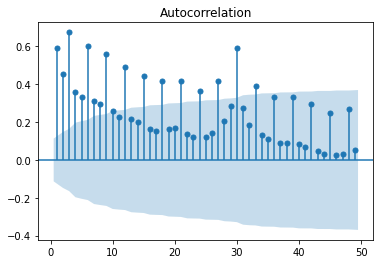

In [42]:
sm.graphics.tsaplots.plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1,50), alpha=0.05) #alpha es el porcentaje error
plt.show()

Por ejemplo, en la gráfica anterior, podemos tomar hasta 10 elementos (pues hay 10 picos por arriba del área azul antes del primer pico dentro del área. )

## Media con pesos

In [46]:
def weighted_average(series, w):
    result = 0.0
    w.reverse()
    for n in range(len(w)):
        result += series.iloc[-n-1] * w[n]
    return float(result)

weighted_average(ads, [0.6, 0.3, 0.1])

98423.0

In [49]:
ads.tail(3)

,Ads
Time,
2017-09-21 21:00:00,103080
2017-09-21 22:00:00,95155
2017-09-21 23:00:00,80285


In [51]:
103080 * 0.6 + 95155 * 0.3 + 80285 * 0.1

98423.0